In [31]:
%pip install osmnx
%pip install osm2geojson
import pandas as pd
import osmnx as ox
import geopandas as gpd
import osm2geojson
import codecs
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
#Import data from maps xml file
graph = ox.graph_from_xml('data/map.osm')
geometries = ox.geometries_from_xml('data/map.osm')
geometries


name name:da name:ja name:ko name:nn  \
element_type osmid                                                           
node         27323968                 Lund    Lund     ルンド      룬드    Lund   
             27368367                  NaN     NaN     NaN     NaN     NaN   
             27368371               Lund C     NaN     NaN     NaN     NaN   
             27368381  Lund centralstation     NaN     NaN     NaN     NaN   
             27368503                  NaN     NaN     NaN     NaN     NaN   
...                                    ...     ...     ...     ...     ...   
relation     5150208                   NaN     NaN     NaN     NaN     NaN   
             5555489                   NaN     NaN     NaN     NaN     NaN   
             5555490                   NaN     NaN     NaN     NaN     NaN   
             8466886            Parentesen     NaN     NaN     NaN     NaN   
             15021533       Järnåkraskolan     NaN     NaN     NaN     NaN   

                      name:no name:ru name:sv name:yue name:zh place  \
element_type osmid                                                     
node         27323968    Lund    Лунд    Lund       隆德      隆德  town   
             27368367     NaN     NaN     NaN      NaN     NaN   NaN   
             27368371     NaN     NaN     NaN      NaN     NaN   NaN   
             27368381     NaN     NaN     NaN      NaN     NaN   NaN   
             27368503     NaN     NaN     NaN      NaN     NaN   NaN   
...                       ...     ...     ...      ...     ...   ...   
relation     5150208      NaN     NaN     NaN      NaN     NaN   NaN   
             5555489      NaN     NaN     NaN      NaN     NaN   NaN   
             5555490      NaN     NaN     NaN      NaN     NaN   NaN   
             8466886      NaN     NaN     NaN      NaN     NaN   NaN   
             15021533     NaN     NaN     NaN      NaN     NaN   NaN   

                      population ref:se:pts:postort ref:se:scb   wikidata  \
element_type osmid                                                          
node         27323968      82800               LUND       3584      Q2167   
             27368367        NaN                NaN        NaN        NaN   
             27368371        NaN                NaN        NaN        NaN   
             27368381        NaN                NaN        NaN        NaN   
             27368503        NaN                NaN        NaN        NaN   
...                          ...                ...        ...        ...   
relation     5150208         NaN                NaN        NaN        NaN   
             5555489         NaN                NaN        NaN        NaN   
             5555490         NaN                NaN        NaN        NaN   
             8466886         NaN                NaN        NaN  Q19899755   
             15021533        NaN                NaN        NaN        NaN   

                      wikipedia  \
element_type osmid                
node         27323968   sv:Lund   
             27368367       NaN   
             27368371       NaN   
             27368381       NaN   
             27368503       NaN   
...                         ...   
relation     5150208        NaN   
             5555489        NaN   
             5555490        NaN   
             8466886        NaN   
             15021533       NaN   

                                                                geometry  \
element_type osmid                                                         
node         27323968                          POINT (13.19294 55.70293)   
             27368367                          POINT (13.18776 55.70368)   
             27368371                          POINT (13.18776 55.70444)   
             27368381                          POINT (13.18635 55.70677)   
             27368503                          POINT (13.18752 55.69102)   
...                                                                  ...   
relation     5150208

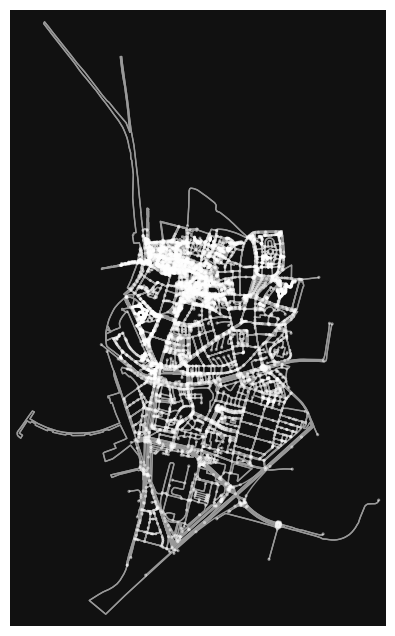

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [33]:
ox.plot_graph(graph,node_alpha=0.5,node_size=5)

In [72]:
multipolygon = geometries[geometries['type'] == 'multipolygon'][['geometry', 'name']]
pd.set_option('display.max_columns', 500)
df = multipolygon;
df

geometry  \
element_type osmid                                                         
relation     1308229   POLYGON ((13.19914 55.70293, 13.19915 55.70279...   
             1323075   POLYGON ((13.20153 55.69585, 13.20160 55.69570...   
             1323396   POLYGON ((13.19407 55.69392, 13.19407 55.69390...   
             1364131   POLYGON ((13.19541 55.70219, 13.19539 55.70234...   
             1401538   MULTIPOLYGON (((13.18955 55.70445, 13.18958 55...   
             1423213   POLYGON ((13.18737 55.70247, 13.18748 55.70254...   
             1423278   POLYGON ((13.18854 55.70327, 13.18860 55.70324...   
             1686288   POLYGON ((13.19601 55.70407, 13.19606 55.70412...   
             1686289   POLYGON ((13.19534 55.70370, 13.19514 55.70376...   
             1690170   POLYGON ((13.19659 55.70107, 13.19657 55.70112...   
             1746216   POLYGON ((13.18841 55.68854, 13.18868 55.68850...   
             1998200   POLYGON ((13.19276 55.70397, 13.19282 55.70396...   
             1998201   POLYGON ((13.19275 55.70435, 13.19275 55.70440...   
             2004377   POLYGON ((13.19024 55.70396, 13.19023 55.70393...   
             2005792   POLYGON ((13.19174 55.70390, 13.19188 55.70389...   
             2098992   POLYGON ((13.18943 55.70423, 13.18943 55.70429...   
             2194468   POLYGON ((13.18723 55.70469, 13.18744 55.70471...   
             2417350   POLYGON ((13.19526 55.70173, 13.19527 55.70181...   
             2531171   POLYGON ((13.19301 55.70235, 13.19297 55.70235...   
             2531627   POLYGON ((13.18789 55.70405, 13.18790 55.70408...   
             2531628   MULTIPOLYGON (((13.19371 55.70214, 13.19377 55...   
             2531629   POLYGON ((13.19448 55.70395, 13.19448 55.70402...   
             2541661   POLYGON ((13.20407 55.70177, 13.20422 55.70212...   
             3005700   POLYGON ((13.19848 55.69786, 13.19847 55.69786...   
             4057070   POLYGON ((13.20341 55.69722, 13.20355 55.69760...   
             4115323   POLYGON ((13.18810 55.69647, 13.18817 55.69648...   
             4754432   POLYGON ((13.20294 55.68876, 13.20317 55.68874...   
             4756920   POLYGON ((13.18692 55.70078, 13.18676 55.70069...   
             4806850   POLYGON ((13.20236 55.70426, 13.20245 55.70429...   
             4806851   POLYGON ((13.20442 55.70397, 13.20443 55.70396...   
             4806881   POLYGON ((13.20297 55.70516, 13.20298 55.70520...   
             4819414   POLYGON ((13.18856 55.70389, 13.18855 55.70389...   
             4829890   POLYGON ((13.20277 55.70112, 13.20278 55.70113...   
             4871396   POLYGON ((13.19501 55.70506, 13.19528 55.70500...   
             5150208   POLYGON ((13.18905 55.70417, 13.18906 55.70417...   
             5555489   POLYGON ((13.19733 55.70508, 13.19735 55.70510...   
             5555490   POLYGON ((13.19766 55.70493, 13.19768 55.70492...   
             8466886   MULTIPOLYGON (((13.19930 55.69799, 13.19925 55...   
             15021533  POLYGON ((13.19345 55.69345, 13.19329 55.69393...   

                                  name  
element_type osmid                      
relation     1308229               NaN  
             1323075               NaN  
             1323396               NaN  
             1364131   Lunds Konsthall  
             1401538       Bytaregränd  
             1423213               NaN  
             1423278               NaN  
             1686288               NaN  
             1686289   Domkapitelhuset  
             1690170               NaN  
             1746216         Tetra Pak  
             1998200   Domkyrkoplatsen  
             1998201               NaN  
             2004377               NaN  
             2005792               NaN  
             2098992               NaN  
             2194468               NaN  
             2417350     Mårtenstorget  
             2531171        Stortorget  
             2531627         Bantorget  
             2531628    Botulfsplatsen  
    

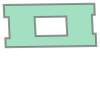

-------------


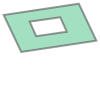

-------------


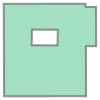

-------------
Lunds Konsthall


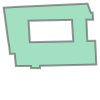

-------------
Bytaregränd


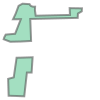

-------------


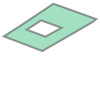

-------------


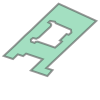

-------------


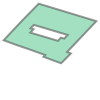

-------------
Domkapitelhuset


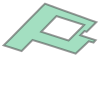

-------------


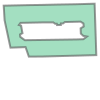

-------------
Tetra Pak


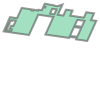

-------------
Domkyrkoplatsen


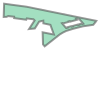

-------------


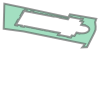

-------------


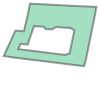

-------------


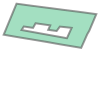

-------------


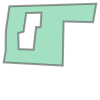

-------------


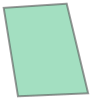

-------------
Mårtenstorget


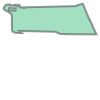

-------------
Stortorget


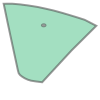

-------------
Bantorget


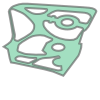

-------------
Botulfsplatsen


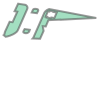

-------------
Krafts torg


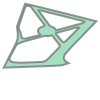

-------------


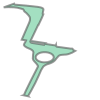

-------------
Korpamoen


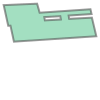

-------------


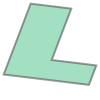

-------------
Mejeriplatsen


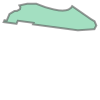

-------------


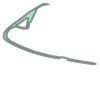

-------------


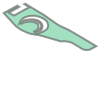

-------------


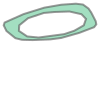

-------------


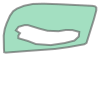

-------------


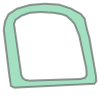

-------------


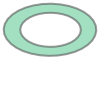

-------------


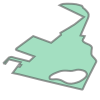

-------------
Tegnérsplatsen


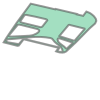

-------------


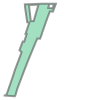

-------------


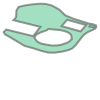

-------------


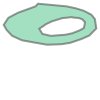

-------------
Parentesen


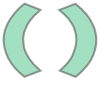

-------------
Järnåkraskolan


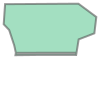

-------------


In [85]:
df.iloc[4]
#gpd.GeoSeries([polydiff])
for row in df.values:
    if str(row[1]) != 'nan':
        print(row[1])   
    display(row[0])
    print("-------------")


In [84]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
myPoly = gpd.GeoSeries(df.values)
myPoly.plot()
plt.show()


ValueError: Data must be 1-dimensional